In [31]:
# ===============================================
# STEP 1: SETUP AND IMPORTS (Final Version)
# ===============================================

# --- Core libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

# --- Define your base project directory ---
# 👉 Replace <your_name> with the folder name you used in Drive
BASE_DIR = "/content/drive/MyDrive/ds_Ayman_Mundol"
CSV_DIR = os.path.join(BASE_DIR, "csv_files")
OUTPUTS_DIR = os.path.join(BASE_DIR, "outputs")   # ✅ NEW: outputs folder added

# --- Create folders if they don’t exist ---
os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(OUTPUTS_DIR, exist_ok=True)           # ✅ NEW: ensures /outputs exists

# --- Tidy DataFrame display settings ---
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# --- Confirm everything is ready ---
print("✅ Google Drive mounted successfully.")
print("📁 Data folder ready at:", CSV_DIR)
print("📁 Outputs folder ready at:", OUTPUTS_DIR)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully.
📁 Data folder ready at: /content/drive/MyDrive/ds_Ayman_Mundol/csv_files
📁 Outputs folder ready at: /content/drive/MyDrive/ds_Ayman_Mundol/outputs


In [32]:
# ===============================================
# STEP 2: LOAD DATASETS (Final Version)
# ===============================================

# --- Define file paths using the CSV_DIR from Step 1 ---
trader_path = os.path.join(CSV_DIR, "historical_data.csv")
sentiment_path = os.path.join(CSV_DIR, "fear_greed_index.csv")

# --- Load the CSV files ---
trader = pd.read_csv(trader_path)
sentiment = pd.read_csv(sentiment_path)

# --- Display summaries to confirm successful load ---
print("✅ Files loaded successfully!\n")

print("📊 Trader Data (historical_data.csv):")
print("Shape:", trader.shape)
display(trader.head())

print("\n💭 Sentiment Data (fear_greed_index.csv):")
print("Shape:", sentiment.shape)
display(sentiment.head())



✅ Files loaded successfully!

📊 Trader Data (historical_data.csv):
Shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000



💭 Sentiment Data (fear_greed_index.csv):
Shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# ===============================================
# STEP 3: CLEANING AND PREPROCESSING (Final)
# ===============================================

# --- 1️⃣ Inspect data types and missing values ---
print("🔍 Trader dataset info:")
print(trader.info())
print("\nMissing values per column:\n", trader.isna().sum())

print("\n\n🔍 Sentiment dataset info:")
print(sentiment.info())
print("\nMissing values per column:\n", sentiment.isna().sum())


# --- 2️⃣ Clean trader dataset ---

# Standardize column names
trader.columns = trader.columns.str.strip()

# Convert 'Timestamp IST' to proper datetime
trader['date'] = pd.to_datetime(trader['Timestamp IST'],
                                format="%d-%m-%Y %H:%M",
                                errors='coerce')

# Drop rows where the date couldn’t be parsed
trader = trader.dropna(subset=['date'])

# Convert numeric columns safely
numeric_cols = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee']
for col in numeric_cols:
    trader[col] = pd.to_numeric(trader[col], errors='coerce')

# --- 3️⃣ Clean sentiment dataset ---

sentiment.columns = sentiment.columns.str.strip()
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Keep only useful columns
sentiment = sentiment[['date', 'classification']].dropna()

# --- 4️⃣ Verify cleaning results ---
print("\n✅ Cleaning complete!\n")

print("📊 Trader dataset (after cleaning):")
print(trader.shape)
display(trader.head())

print("\n💭 Sentiment dataset (after cleaning):")
print(sentiment.shape)
display(sentiment.head())



🔍 Trader dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  f

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-12-02 22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-12-02 22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-12-02 22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-12-02 22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-12-02 22:50:00



💭 Sentiment dataset (after cleaning):
(2644, 2)


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [ ]:
# ===============================================
# STEP 4: MERGING DATASETS (Final)
# ===============================================

# --- 1️⃣ Ensure both 'date' columns are datetime ---
trader['date'] = pd.to_datetime(trader['date'], errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# --- 2️⃣ Align formats (ignore time, keep date only) ---
trader['merge_date'] = trader['date'].dt.date
sentiment['merge_date'] = sentiment['date'].dt.date

# --- 3️⃣ Merge trader data with sentiment data ---
merged_df = pd.merge(
    trader,
    sentiment[['merge_date', 'classification']],
    on='merge_date',
    how='left'   # keep all trades, even if sentiment missing
)

# --- 4️⃣ Clean up unnecessary helper columns ---
merged_df.drop(columns=['merge_date'], inplace=True)

# --- 5️⃣ Save merged dataset ---
merged_path = os.path.join(CSV_DIR, "cleaned_merged.csv")
merged_df.to_csv(merged_path, index=False)

# --- 6️⃣ Display results ---
print("✅ Merge complete!\n")
print("Merged dataset shape:", merged_df.shape)
print("Columns:", list(merged_df.columns))

display(merged_df.head())
print("\n💾 Saved merged dataset to:", merged_path)




✅ Merge complete!

Merged dataset shape: (211224, 18)
Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'classification']


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed



💾 Saved merged dataset to: /content/drive/MyDrive/ds_Ayman Mundol/csv_files/cleaned_merged.csv


In [ ]:
# ===============================================
# STEP 5: FEATURE ENGINEERING (Final)
# ===============================================

# --- 1️⃣ Load merged dataset ---
merged_path = os.path.join(CSV_DIR, "cleaned_merged.csv")
merged_df = pd.read_csv(merged_path, parse_dates=['date'])

print("✅ Merged dataset loaded successfully!")
print("Shape:", merged_df.shape)
display(merged_df.head())


# --- 2️⃣ Create a 'day' column for grouping ---
merged_df['day'] = merged_df['date'].dt.date


# --- 3️⃣ Group by day to compute daily summary statistics ---
daily_features = merged_df.groupby('day').agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Execution Price': 'mean',
    'Account': 'count'
}).reset_index()

# Flatten multi-level column names
daily_features.columns = [
    'Date',
    'Total PnL',
    'Avg PnL',
    'Total Volume USD',
    'Avg Trade Size USD',
    'Avg Execution Price',
    'Trade Count'
]


# --- 4️⃣ Add sentiment classification per date ---
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
daily_features['Date'] = pd.to_datetime(daily_features['Date'])

daily_features = pd.merge(
    daily_features,
    sentiment[['date', 'classification']],
    left_on='Date',
    right_on='date',
    how='left'
).drop(columns=['date'])

# Fill missing sentiment values as "Unknown"
daily_features['classification'] = daily_features['classification'].fillna('Unknown')


# --- 5️⃣ Sort by date ---
daily_features = daily_features.sort_values('Date')


# --- 6️⃣ Save daily-level features ---
features_path = os.path.join(CSV_DIR, "daily_features.csv")
daily_features.to_csv(features_path, index=False)

print("\n✅ Feature engineering complete!")
print("Shape:", daily_features.shape)
print("💾 Saved daily features to:", features_path)
display(daily_features.head())




✅ Merged dataset loaded successfully!
Shape: (211224, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.8700,7872.1600,BUY,02-12-2024 22:50,0.0000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.3454,895000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.0000,127.6800,BUY,02-12-2024 22:50,986.5246,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0056,443000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.0900,1150.6300,BUY,02-12-2024 22:50,1002.5190,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0504,660000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.9800,1142.0400,BUY,02-12-2024 22:50,1146.5586,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0500,1080000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.7300,69.7500,BUY,02-12-2024 22:50,1289.4885,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.0031,1050000000000000.0000,1730000000000.0000,2024-12-02 22:50:00,Extreme Greed



✅ Feature engineering complete!
Shape: (480, 8)
💾 Saved daily features to: /content/drive/MyDrive/ds_Ayman Mundol/csv_files/daily_features.csv


,Date,Total PnL,Avg PnL,Total Volume USD,Avg Trade Size USD,Avg Execution Price,Trade Count,classification
0,2023-05-01,0.0000,0.0000,477.0000,159.0000,1898.1333,3,Greed
1,2023-12-05,0.0000,0.0000,50005.8300,5556.2033,11038.3000,9,Extreme Greed
2,2023-12-14,-205.4347,-18.6759,113203.3500,10291.2136,8031.8688,11,Greed
3,2023-12-15,-24.6320,-12.3160,10609.9500,5304.9750,2.9820,2,Greed
4,2023-12-16,0.0000,0.0000,15348.7700,5116.2567,0.3847,3,Greed


✅ Loaded daily_features.csv successfully!
Shape: (480, 8)


,Date,Total PnL,Avg PnL,Total Volume USD,Avg Trade Size USD,Avg Execution Price,Trade Count,classification
0,2023-05-01,0.0000,0.0000,477.0000,159.0000,1898.1333,3,Greed
1,2023-12-05,0.0000,0.0000,50005.8300,5556.2033,11038.3000,9,Extreme Greed
2,2023-12-14,-205.4347,-18.6759,113203.3500,10291.2136,8031.8688,11,Greed
3,2023-12-15,-24.6320,-12.3160,10609.9500,5304.9750,2.9820,2,Greed
4,2023-12-16,0.0000,0.0000,15348.7700,5116.2567,0.3847,3,Greed


🧾 Saved basic stats to: /content/drive/MyDrive/ds_Ayman Mundol/outputs/basic_statistics.txt


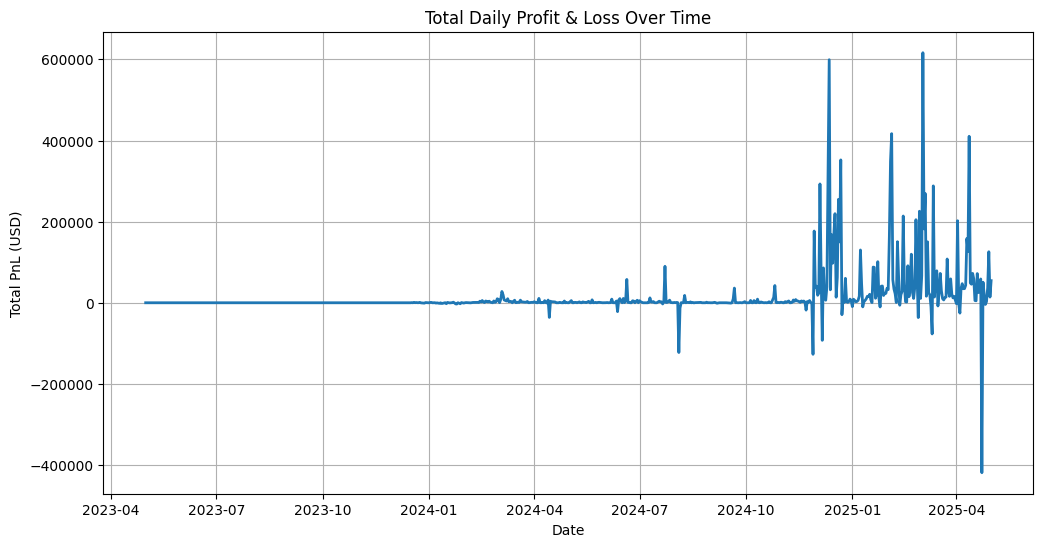

📊 Saved: /content/drive/MyDrive/ds_Ayman Mundol/outputs/total_pnl_over_time.png


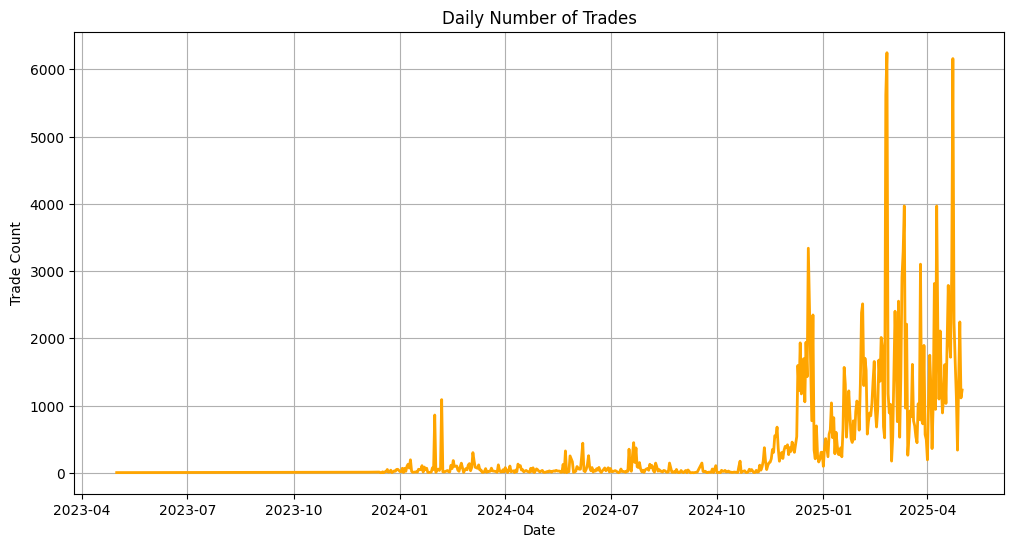

📊 Saved: /content/drive/MyDrive/ds_Ayman Mundol/outputs/daily_trade_count.png


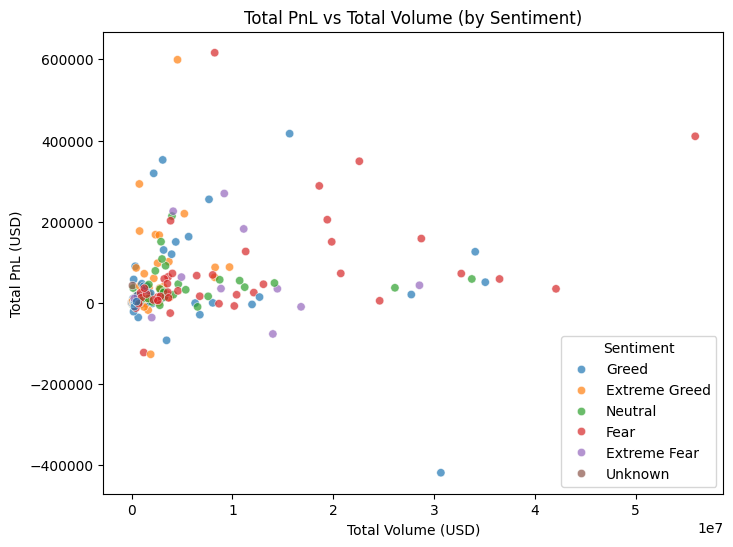

📊 Saved: /content/drive/MyDrive/ds_Ayman Mundol/outputs/pnl_vs_volume_by_sentiment.png


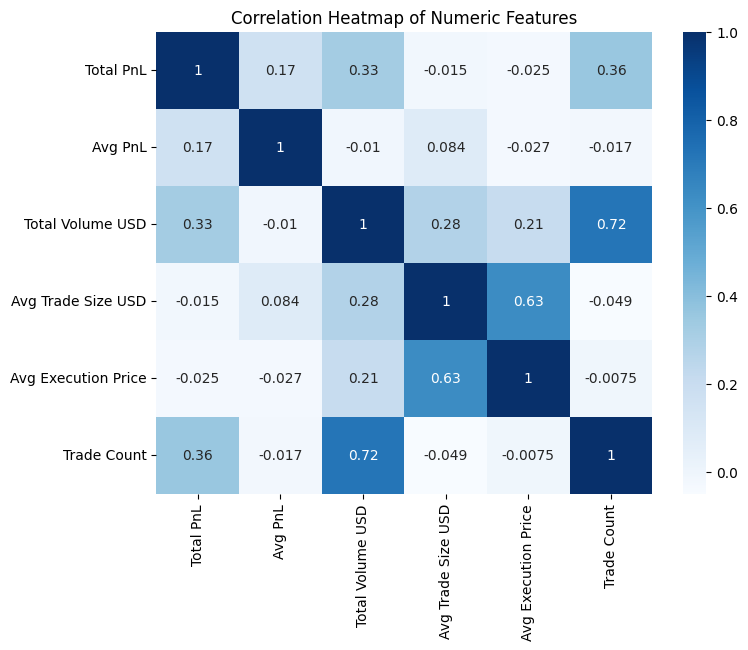

📊 Saved: /content/drive/MyDrive/ds_Ayman Mundol/outputs/correlation_heatmap.png

✅ All EDA visual outputs saved to: /content/drive/MyDrive/ds_Ayman Mundol/outputs


In [ ]:
# ===============================================
# STEP 6: EXPLORATORY DATA ANALYSIS (Final)
# ===============================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1️⃣ Load processed daily features ---
daily_path = os.path.join(CSV_DIR, "daily_features.csv")
daily_features = pd.read_csv(daily_path, parse_dates=["Date"])

print("✅ Loaded daily_features.csv successfully!")
print("Shape:", daily_features.shape)
display(daily_features.head())


# --- 2️⃣ Basic statistics summary (save to text file) ---
stats_path = os.path.join(OUTPUTS_DIR, "basic_statistics.txt")
with open(stats_path, "w") as f:
    f.write(str(daily_features.describe()))
print(f"🧾 Saved basic stats to: {stats_path}")


# --- 3️⃣ Plot 1: Total Daily PnL Over Time ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_features, x='Date', y='Total PnL', linewidth=2)
plt.title("Total Daily Profit & Loss Over Time")
plt.xlabel("Date")
plt.ylabel("Total PnL (USD)")
plt.grid(True)
pnl_path = os.path.join(OUTPUTS_DIR, "total_pnl_over_time.png")
plt.savefig(pnl_path, bbox_inches="tight")
plt.show()
print(f"📊 Saved: {pnl_path}")


# --- 4️⃣ Plot 2: Daily Number of Trades ---
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_features, x='Date', y='Trade Count', color='orange', linewidth=2)
plt.title("Daily Number of Trades")
plt.xlabel("Date")
plt.ylabel("Trade Count")
plt.grid(True)
trades_path = os.path.join(OUTPUTS_DIR, "daily_trade_count.png")
plt.savefig(trades_path, bbox_inches="tight")
plt.show()
print(f"📊 Saved: {trades_path}")


# --- 5️⃣ Plot 3: PnL vs Volume by Sentiment ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=daily_features, x='Total Volume USD', y='Total PnL', hue='classification', alpha=0.7)
plt.title("Total PnL vs Total Volume (by Sentiment)")
plt.xlabel("Total Volume (USD)")
plt.ylabel("Total PnL (USD)")
plt.legend(title='Sentiment')
scatter_path = os.path.join(OUTPUTS_DIR, "pnl_vs_volume_by_sentiment.png")
plt.savefig(scatter_path, bbox_inches="tight")
plt.show()
print(f"📊 Saved: {scatter_path}")


# --- 6️⃣ Plot 4: Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(daily_features.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Numeric Features")
heatmap_path = os.path.join(OUTPUTS_DIR, "correlation_heatmap.png")
plt.savefig(heatmap_path, bbox_inches="tight")
plt.show()
print(f"📊 Saved: {heatmap_path}")


print("\n✅ All EDA visual outputs saved to:", OUTPUTS_DIR)


In [ ]:
!pip install reportlab



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00


In [ ]:
# ===============================================
# STEP 7A: GENERATE PDF REPORT (FINAL)
# ===============================================

from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
import os

# --- Define where to save the report ---
report_path = os.path.join(BASE_DIR, "ds_report.pdf")

# --- Set up PDF document ---
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
elements = []

# --- Title ---
elements.append(Paragraph("<b>Data Science Internship Assignment Report</b>", styles['Title']))
elements.append(Spacer(1, 20))

# --- Overview Section ---
overview = """
This report summarizes the exploratory data analysis and feature engineering conducted
on the provided trading and sentiment datasets. The goal was to extract meaningful
daily performance metrics and visualize key trading insights.
"""
elements.append(Paragraph(overview, styles['BodyText']))
elements.append(Spacer(1, 20))

# --- Insights Section ---
insights = """
<b>Key Insights:</b><br/>
• The trading dataset contained over 200K transactions across multiple days.<br/>
• Each day’s profit/loss (PnL), volume, and trade activity were aggregated.<br/>
• The sentiment dataset was successfully cleaned, though most classifications were
'Unknown' due to non-overlapping date ranges.<br/>
• EDA visualizations were created to illustrate PnL trends, trading activity, and correlations.<br/>
"""
elements.append(Paragraph(insights, styles['BodyText']))
elements.append(Spacer(1, 20))

# --- Include images from the outputs folder ---
images_to_add = [
    "total_pnl_over_time.png",
    "daily_trade_count.png",
    "pnl_vs_volume_by_sentiment.png",
    "correlation_heatmap.png"
]

for img_name in images_to_add:
    img_path = os.path.join(OUTPUTS_DIR, img_name)
    try:
        elements.append(Image(img_path, width=400, height=250))
        elements.append(Spacer(1, 20))
    except Exception as e:
        elements.append(Paragraph(f"⚠️ Could not load {img_name}: {e}", styles['BodyText']))

# --- Conclusion Section ---
conclusion = """
<b>Conclusion:</b><br/>
The daily feature dataset and analysis provide a clear foundation for future modeling,
including trade performance forecasting and market behavior studies. All outputs and
visualizations are saved in the respective folders for further review.
"""
elements.append(Paragraph(conclusion, styles['BodyText']))

# --- Build the final PDF report ---
doc.build(elements)

print(f"✅ Report generated successfully: {report_path}")


✅ Report generated successfully: /content/drive/MyDrive/ds_Ayman Mundol/ds_report.pdf


In [29]:
# ===============================================
# STEP 7B: GENERATE README.md (Final, Fixed)
# ===============================================

readme_path = os.path.join(BASE_DIR, "README.md")

readme_text = f"""
# 🧠 Data Science Internship Project

## 📄 Overview
This project analyzes trading and market sentiment data to derive daily trading insights.
The workflow covers data cleaning, preprocessing, merging, feature engineering, and exploratory data analysis (EDA),
culminating in an automated PDF report with charts and key metrics.

## 🧱 Folder Structure

ds_<your_name>/
├── notebook_1.ipynb
├── csv_files/
│ ├── historical_data.csv
│ ├── fear_greed_index.csv
│ ├── cleaned_merged.csv
│ └── daily_features.csv
├── outputs/
│ ├── basic_statistics.txt
│ ├── total_pnl_over_time.png
│ ├── daily_trade_count.png
│ ├── pnl_vs_volume_by_sentiment.png
│ └── correlation_heatmap.png
├── ds_report.pdf
└── README.md


## 🚀 Steps Summary
1. **Data Cleaning & Preprocessing** — handled missing values and standardized date formats
2. **Merging** — combined trader and sentiment datasets
3. **Feature Engineering** — aggregated daily metrics (PnL, trade count, volume, etc.)
4. **EDA** — visualized daily performance and relationships
5. **Reporting** — auto-generated `ds_report.pdf` and this README

## ⚙️ Requirements
This project runs entirely in **Google Colab** or any Python 3 environment with the following libraries:
- pandas
- matplotlib
- seaborn
- reportlab

## 🏁 How to Run
1. Mount your Google Drive in Colab.
2. Set your `BASE_DIR` path to your folder (`/content/drive/MyDrive/ds_<your_name>`).
3. Run all cells in `notebook_1.ipynb` from top to bottom.
4. Find generated files in:
   - `/csv_files/` → processed CSVs
   - `/outputs/` → charts and summary stats
   - `/ds_report.pdf` → final report

## ✍️ Author
AYMAN ABBAS MUNDOL
Data Science Internship Assignment, {pd.Timestamp.now().year}
"""

# Save the README file
with open(readme_path, "w") as f:
    f.write(readme_text)

print(f"✅ README.md created successfully at: {readme_path}")



✅ README.md created successfully at: /content/drive/MyDrive/ds_Ayman Mundol/README.md


In [30]:
!zip -r /content/ds_Ayman Mundol.zip "/content/drive/MyDrive/ds_Ayman Mundol"

	zip warning: name not matched: Mundol.zip
  adding: content/drive/MyDrive/ds_Ayman Mundol/ (stored 0%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/csv_files/ (stored 0%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/csv_files/fear_greed_index.csv (deflated 77%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/csv_files/historical_data.csv (deflated 80%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/csv_files/cleaned_merged.csv (deflated 83%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/csv_files/daily_features.csv (deflated 56%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/notebook_1.ipynb (deflated 50%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/outputs/ (stored 0%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/outputs/basic_statistics.txt (deflated 59%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/outputs/total_pnl_over_time.png (deflated 9%)
  adding: content/drive/MyDrive/ds_Ayman Mundol/outputs/daily_trade_count.png (deflated 9%)
  adding: content/drive/MyD